In [9]:
#import statements
from pyspark.sql import SparkSession

In [10]:
spark = SparkSession.builder.enableHiveSupport().appName('ReadWriteData').getOrCreate()
sc = spark.sparkContext

In [11]:
#check to see if thata is available in HDFS
!hdfs dfs -ls /user/zxie8/big_data/

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 1 items
-rw-r--r--   3 zxie8 zxie8 6325565224 2020-07-27 04:19 /user/zxie8/big_data/review.json


In [12]:
%time data = sc.textFile("/user/zxie8/big_data/review.json")
#%time data = sc.textFile("T:/data/chicago-food-inspections/food-inspections.csv")

CPU times: user 1.98 ms, sys: 2.64 ms, total: 4.62 ms
Wall time: 665 ms


In [13]:
#Total Record Count
%time data.count()

CPU times: user 26.8 ms, sys: 9.87 ms, total: 36.7 ms
Wall time: 17.5 s


8021122

### P1

In [55]:
path = "/user/zxie8/big_data/review.json"
df = spark.read.json(path)

In [ ]:
# df=spark.read.json("/user/zxie8/big_data/review.json", multiLine=True)

In [56]:
df.count()

8021122

1

In [57]:
df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [16]:
df.createOrReplaceTempView("review")

In [19]:
# val df1 = spark.sql("SELECT * FROM  review limit 10")
# df1.show()

In [58]:
df.show(3)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|   0|2013-12-07 03:16:52|    1|UmFMZ8PyXZTY2Qcwz...|  1.0|I am actually hor...|     1|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|   0|2015-12-05 03:18:11|    0|LG2ZaYiOgpr2DK_90...|  5.0|I love Deagan's. ...|     1|V34qejxNsCbcgD8C0...|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
only showing top 3 rows



In [27]:
from pyspark.sql import HiveContext
hive_context = HiveContext(sc)

In [28]:
df1 = hive_context.table("big_data_group_2.review")
df1.show(5)

+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|date1|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
|xQY8N_XvtGbearJ5X...|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|    2| null|As someone who ha...|     5|    0|   0|
|UmFMZ8PyXZTY2Qcwz...|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|    1| null|I am actually hor...|     1|    1|   0|
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|    5| null|I love Deagan's. ...|     1|    0|   0|
|i6g_oA9Yf9Y31qt0w...|ofKDkJKXSKZXu5xJN...|5JxlZaqCnk1MnbgRi...|    1| null|Dismal, lukewarm,...|     0|    0|   0|
|6TdNDKywdbjoTkize...|UgMW8bLE0QMJDCkQ1...|IS4cv902ykd8wj1TR...|    4| null|Oh happy day, fin...|     0|    0|   0|
+--------------------+--------------------+--------------------+-----+--

In [29]:
#display data in a table
spark.sql('select * from big_data_group_2.review').show(5)

+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|date1|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
|xQY8N_XvtGbearJ5X...|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|    2| null|As someone who ha...|     5|    0|   0|
|UmFMZ8PyXZTY2Qcwz...|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|    1| null|I am actually hor...|     1|    1|   0|
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|    5| null|I love Deagan's. ...|     1|    0|   0|
|i6g_oA9Yf9Y31qt0w...|ofKDkJKXSKZXu5xJN...|5JxlZaqCnk1MnbgRi...|    1| null|Dismal, lukewarm,...|     0|    0|   0|
|6TdNDKywdbjoTkize...|UgMW8bLE0QMJDCkQ1...|IS4cv902ykd8wj1TR...|    4| null|Oh happy day, fin...|     0|    0|   0|
+--------------------+--------------------+--------------------+-----+--

In [30]:
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df.rdd.getNumPartitions()

1

In [32]:
df.dtypes

[('business_id', 'string'),
 ('cool', 'bigint'),
 ('date', 'string'),
 ('funny', 'bigint'),
 ('review_id', 'string'),
 ('stars', 'double'),
 ('text', 'string'),
 ('useful', 'bigint'),
 ('user_id', 'string')]

In [33]:
df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [39]:
df.show(3)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+



In [45]:
df1.show(3)

+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|date1|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
|xQY8N_XvtGbearJ5X...|OwjRMXRC0KyPrIlcj...|-MhfebM0QIsKt87iD...|    2| null|As someone who ha...|     5|    0|   0|
|UmFMZ8PyXZTY2Qcwz...|nIJD_7ZXHq-FX8byP...|lbrU8StCq3yDfr-QM...|    1| null|I am actually hor...|     1|    1|   0|
|LG2ZaYiOgpr2DK_90...|V34qejxNsCbcgD8C0...|HQl28KMwrEKHqhFrr...|    5| null|I love Deagan's. ...|     1|    0|   0|
+--------------------+--------------------+--------------------+-----+-----+--------------------+------+-----+----+
only showing top 3 rows



In [66]:
dat1=df.groupby("stars").count()
dat1.show()

+-----+-------+
|stars|  count|
+-----+-------+
|  1.0|1283897|
|  4.0|1673404|
|  3.0| 842289|
|  2.0| 635072|
|  5.0|3586460|
+-----+-------+



In [63]:
# Error!!!
# pdf = df.toPandas()
# pdf.plot(kind= 'bar', x='stars')

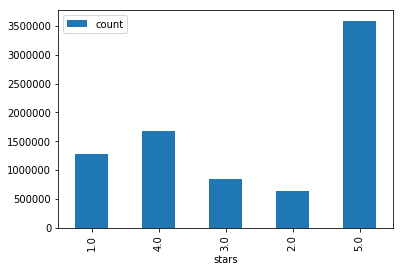

In [67]:
pdf_dat1=dat1.toPandas()
pdf_dat1.plot(kind= 'bar', x='stars')

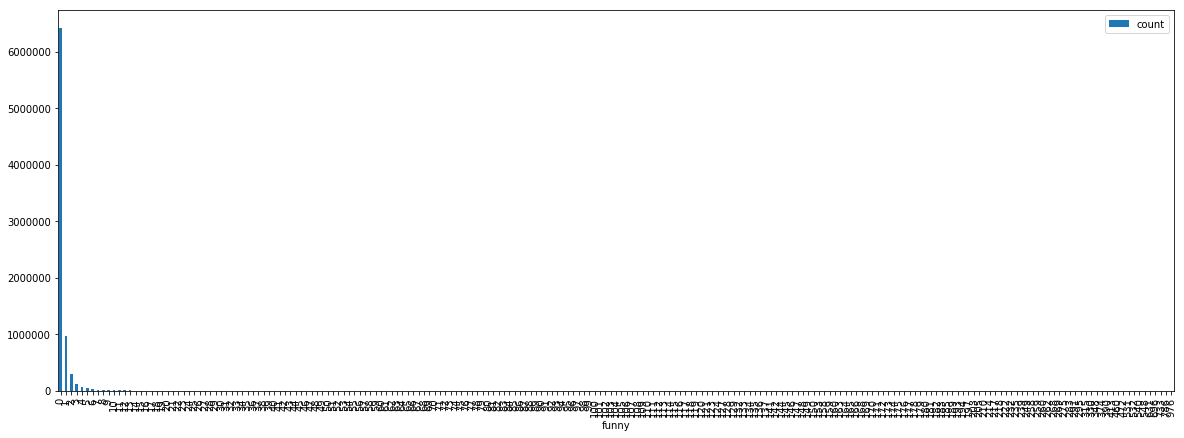

In [78]:
dat1=df.groupby("funny").count().sort("funny").orderBy(["funny"], descending=[0])
pdf_dat1=dat1.toPandas()
pdf_dat1.plot(figsize=(20,7),kind= 'bar', x='funny')

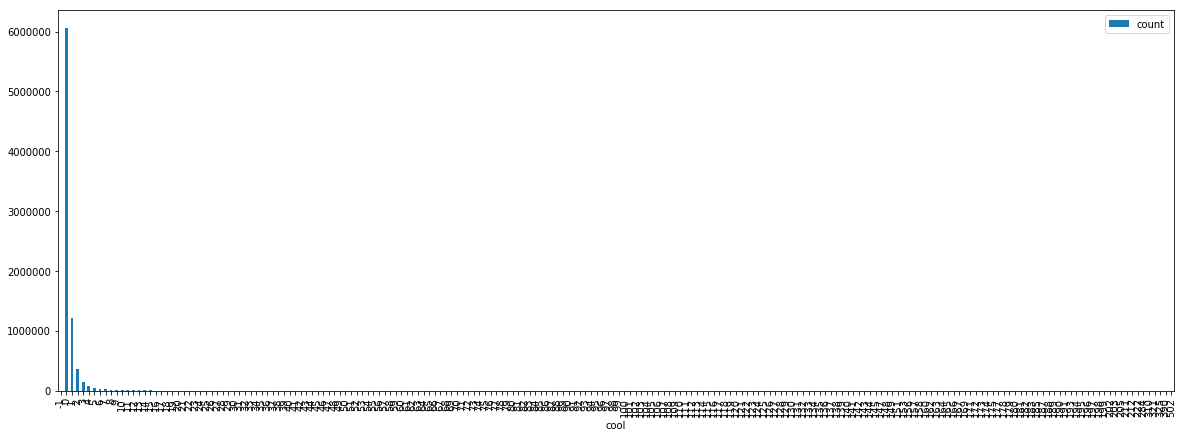

In [80]:
dat2=df.groupby("cool").count().sort("cool").orderBy(["cool"], descending=[0])
pdf_dat2=dat2.toPandas()
pdf_dat2.plot(figsize=(20,7),kind= 'bar', x='cool')

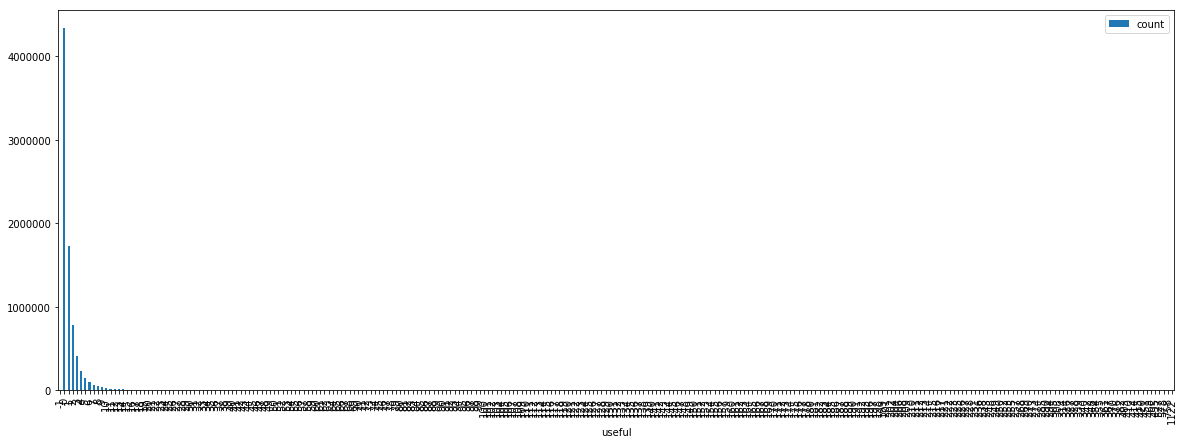

In [81]:
dat3=df.groupby("useful").count().sort("useful").orderBy(["useful"], descending=[0])
pdf_dat3=dat3.toPandas()
pdf_dat3.plot(figsize=(20,7),kind= 'bar', x='useful')

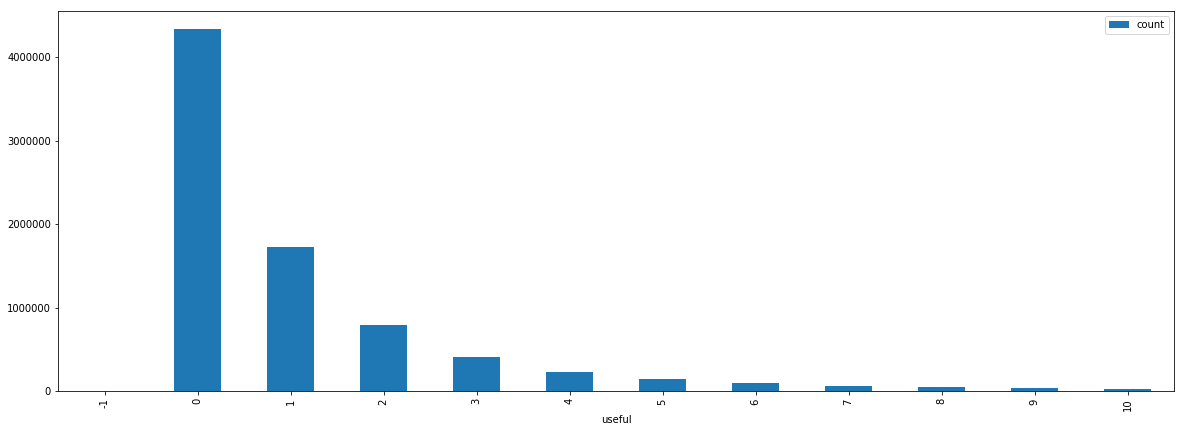

In [83]:
dat3=df.filter(df.useful <= 10).groupby("useful").count().sort("useful").orderBy(["useful"], descending=[0])
pdf_dat3=dat3.toPandas()
pdf_dat3.plot(figsize=(20,7),kind= 'bar', x='useful')